##**Titanic - Apresentação dos Dados**

**Data Dictionary**

| Variable | Definition                                 | Key                                            | Notes                                                                                                                                       |
|----------|--------------------------------------------|------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------|
| survival | Sobrevivência                                   | 0 = No, 1 = Yes                                |                                                                                                                                             |
| pclass   | Classe de ingresso                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      | A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower                                                                |
| sex      | Sexo                                        |                                                |                                                                                                                                             |
| Age      | Idade em anos                              |                                                | Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5                                                        |
| sibsp    | Número de irmãos/cônjuges a bordo do Titanic |                                                | Sibling = brother, sister, stepbrother, stepsister  Spouse = husband, wife (mistresses and fiancés were ignored)                            |
| parch    | Número de pais/filhos a bordo do Titanic |                                                | Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them. |
| ticket   | Número do bilhete                              |                                                |                                                                                                                                             |
| fare     | Tarifa do passageiro                             |                                                |                                                                                                                                             |
| cabin    | Número da cabine                               |                                                |                                                                                                                                             |
| embarked | Porto de embarcação                        | C = Cherbourg, Q = Queenstown, S = Southampton |                                                                                                                                             |

In [ ]:
# Importando bibliotecas Numpy e Pandas
import numpy as np
import pandas as pd

# Estabeleçe uma conexão entre conta do Google Drive e notebook Colab.
from google.colab import drive

In [ ]:
# Monta o Google Drive
drive.mount('/content/grdrive')

Drive already mounted at /content/grdrive; to attempt to forcibly remount, call drive.mount("/content/grdrive", force_remount=True).


In [ ]:
# Lendo arquivos .csv de um caminho especifico
titanic = pd.read_csv('/content/grdrive/MyDrive/Colab Notebooks/Estatistica Descritiva/titanic.csv')

# Imprime primeiras 10 lihas do arquivo
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
# Numero de linhas e colunas
titanic.shape

(891, 12)

In [ ]:
# Mostra nome nome das colunas
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
import pandas as pd
from tabulate import tabulate

# Supondo que você já tenha lido o DataFrame "titanic"
# titanic = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Estatistica Descritiva/titanic.csv')

# Obtendo a primeira linha do DataFrame como um dicionário
first_row_dict = titanic.head(1).to_dict(orient='records')[0]

# Imprimindo a primeira linha com títulos em formato de tabela
table = tabulate([first_row_dict], headers="keys", tablefmt="pretty")
print(table)


+-------------+----------+--------+-------------------------+------+------+-------+-------+-----------+------+-------+----------+
| PassengerId | Survived | Pclass |          Name           | Sex  | Age  | SibSp | Parch |  Ticket   | Fare | Cabin | Embarked |
+-------------+----------+--------+-------------------------+------+------+-------+-------+-----------+------+-------+----------+
|      1      |    0     |   3    | Braund, Mr. Owen Harris | male | 22.0 |   1   |   0   | A/5 21171 | 7.25 |  nan  |    S     |
+-------------+----------+--------+-------------------------+------+------+-------+-------+-----------+------+-------+----------+


##**1) Probabilidade Simples**

###**Titanic - Apresentação dos Dados**

**Data Dictionary**

| Variable | Definition                                 | Key                                            | Notes                                                                                                                                       |
|----------|--------------------------------------------|------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------|
| survival | Sobrevivência                                   | 0 = No, 1 = Yes                                |                                                                                                                                             |
| pclass   | Classe de ingresso                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      | A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower                                                                |
| sex      | Sexo                                        |                                                |                                                                                                                                             |
| Age      | Idade em anos                              |                                                | Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5                                                        |
| sibsp    | Número de irmãos/cônjuges a bordo do Titanic |                                                | Sibling = brother, sister, stepbrother, stepsister  Spouse = husband, wife (mistresses and fiancés were ignored)                            |
| parch    | Número de pais/filhos a bordo do Titanic |                                                | Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them. |
| ticket   | Número do bilhete                              |                                                |                                                                                                                                             |
| fare     | Tarifa do passageiro                             |                                                |                                                                                                                                             |
| cabin    | Número da cabine                               |                                                |                                                                                                                                             |
| embarked | Porto de embarcação                        | C = Cherbourg, Q = Queenstown, S = Southampton |                                                                                                                                             |

#### a) Qual a probabilidade de selecionar uma mulher no Titanic?

In [ ]:
probMulher = len(titanic[titanic['Sex'] == 'female'])/len(titanic)
print('Dados sem formato percentual:',probMulher)

print('A probabilidade de ser mulher no Titanic é de ' + str(round(probMulher * 100,2)) + '%')

Dados sem formato percentual: 0.35241301907968575
A probabilidade de ser mulher no Titanic é de 35.24%


In [ ]:
# Outra forma de calcular

# Calculando a probabilidade de ser mulher no Titanic
numero_mulheres = len(titanic[titanic['Sex'] == 'female'])
numero_total_passageiros = len(titanic)
probabilidade_mulher = numero_mulheres / numero_total_passageiros

# Convertendo a probabilidade para formato percentual com duas casas decimais
probabilidade_formatada = "{:.2%}".format(probabilidade_mulher)

# Criando uma mensagem explicativa
mensagem = f"A probabilidade de ser mulher no Titanic é de {probabilidade_formatada}."

# Imprimindo a mensagem final
print(mensagem)


A probabilidade de ser mulher no Titanic é de 35.24%.


#### b) Comparativos externos: a população mundial tinha essa mesma proporção?

In [ ]:
#referência externa: (https://www.census.gov/data/tables/time-series/demo/popest/pre-1980-national.html)

probMulher_1912 = (45573000/ 93863000)
print('A probabilidade de ser mulher em 1912 é de: ' + str(round(probMulher_1912 * 100,2)) + '%')

A probabilidade de ser mulher em 1912 é de: 48.55%


##**2) Probabilidade da União**

c) Qual a probabilidade de estar acompanhado pelo Sibsp ou pelo Parch?

In [ ]:
Acompanhante = len(titanic[(titanic['SibSp'] > 0) | (titanic['Parch'] > 0)])

probAcomp = (Acompanhante/len(titanic))
print('A probabilidade de estar acompanhado pelo Parch ou SibSp é de: ' + str(round(probAcomp*100,2))+ '%')

A probabilidade de estar acompanhado pelo Parch ou SibSp é de: 39.73%


In [ ]:
print(Acompanhante)
print(len(titanic[(titanic['SibSp'] > 0) | (titanic['Parch'] > 0)]))

354
354


##**3) Probabilidade da Intersecção**

d) Qual a probabilidade de ser mulher e estar acompanhada?

In [ ]:
Mulher_Acompanhada = len(titanic[((titanic['SibSp'] > 0) | (titanic['Parch'] > 0)) & (titanic['Sex'] == 'female')])
probMuAcomp = Mulher_Acompanhada / len(titanic)

print('A probabilidade de ser mulher e estar acompanhada é de: ' + str(round(probMuAcomp*100,2))+ '%')

A probabilidade de ser mulher e estar acompanhada é de: 21.1%


##**4) Probabilidade do Complemento**

e) Qual a probabilidade de ser mulher e não estar acompanhada?

In [ ]:
probMulher_NaoAcompanhada = probMulher - probMuAcomp

print('A probabilidade de ser mulher e não estar acompanhada é de: ' + str(round(probMulher_NaoAcompanhada*100,2))+ '%')

A probabilidade de ser mulher e não estar acompanhada é de: 14.14%


##**5) Probabilidade da Diferença**

f) Qual a probabilidade de estar acompnhado pelo SibSp mas não pelo Parch?

In [ ]:
AcompSibSp = len(titanic[(titanic['Parch'] == 0) & (titanic['SibSp'] > 0)])
probAcomp_SibSp = AcompSibSp/ len(titanic)

print('A probabilidade de estar acompanhado pelo SibSp é de: ' + str(round(probAcomp_SibSp * 100,2))+ '%')

A probabilidade de estar acompanhado pelo SibSp é de: 15.82%


##**6) Probabilidade Condicional**

g) Qual a probabilidade de estar acompanhada sabendo que é uma mulher?

In [ ]:
probCondicional = probMuAcomp / probMulher

print('A probabilidade de estar acompanhdo sabendo que é uma mulher é de: ' + str(round(probCondicional*100,2))+ '%')

A probabilidade de estar acompanhdo sabendo que é uma mulher é de: 59.87%


##**7) Teorema de Bayes**

h) Qual a probabilidade de ser mulher tal que esteja acompanhada?


In [ ]:
probMuTalqueAcomp = (probMulher * probCondicional) / probAcomp

print('A probabilidade de ser mulher tal que esteja acompnhada: ' + str(round(probMuTalqueAcomp*100,2))+ '%')

A probabilidade de ser mulher tal que esteja acompnhada: 53.11%


##**8) Variáveis Aleatórias**

In [ ]:
# Cria nova coluna (titanic['Acompanhado']) e adiciona a soma de (titanic['SibSp'] + titanic['Parch'])
titanic['Acompanhado'] = titanic['SibSp'] + titanic['Parch']

# Imprimindo primeiras 10 minhas da tabela
titanic.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Acompanhado
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S,0
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,0
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C,1
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S,1


In [ ]:
# Faz contagem (value_counts) da coluna "Acompanhado" e organiza em formato decrescente (sort = True) com base nos indices (sort_index)
titanic['Acompanhado'].value_counts(sort = True).sort_index()

0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: Acompanhado, dtype: int64

##**9) Função Probabilidade**

In [ ]:
funcProb = titanic['Acompanhado'].value_counts(sort = True).sort_index() / titanic['Acompanhado'].count()

print(funcProb)

0     0.602694
1     0.180696
2     0.114478
3     0.032548
4     0.016835
5     0.024691
6     0.013468
7     0.006734
10    0.007856
Name: Acompanhado, dtype: float64


In [ ]:
print(f'{round(funcProb * 100, 2)}')

0     60.27
1     18.07
2     11.45
3      3.25
4      1.68
5      2.47
6      1.35
7      0.67
10     0.79
Name: Acompanhado, dtype: float64


##**10) Função Repartição (Função Cumulativa)**

In [ ]:
# retorna uma nova array que contém a soma acumulativa dos elementos ao longo de um determinado eixo.
funcProb.cumsum()

0     0.602694
1     0.783389
2     0.897868
3     0.930415
4     0.947250
5     0.971942
6     0.985410
7     0.992144
10    1.000000
Name: Acompanhado, dtype: float64

In [ ]:
print(f'{round(funcProb.cumsum() * 100, 2)}')

0      60.27
1      78.34
2      89.79
3      93.04
4      94.73
5      97.19
6      98.54
7      99.21
10    100.00
Name: Acompanhado, dtype: float64


##**11) Gráfico Simples**

In [ ]:
import matplotlib.pyplot as plt

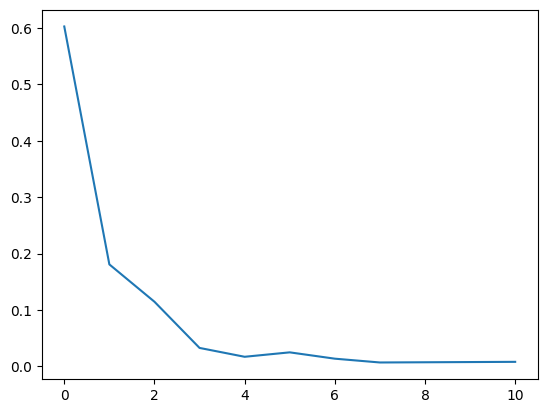

In [ ]:
plt.plot(funcProb)

Text(0.5, 1.0, 'Grafico Acumulativo')

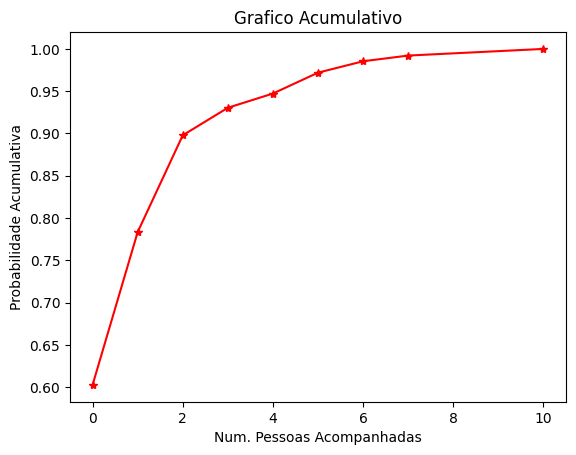

In [ ]:
grafico = funcProb.cumsum()

plt.plot(grafico, 'r*-')
plt.xlabel('Num. Pessoas Acompanhadas')
plt.ylabel('Probabilidade Acumulativa')
plt.title('Grafico Acumulativo')

##**12) Covariância**

In [ ]:
titanic[['Acompanhado', 'Survived']].cov()

,Acompanhado,Survived
Acompanhado,2.603248,0.013063
Survived,0.013063,0.236772


##**13) Correlação**

In [ ]:
titanic[['Acompanhado','Survived']].corr()

,Acompanhado,Survived
Acompanhado,1.000000,0.016639
Survived,0.016639,1.000000


##**14) Tratamento de Dados**

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Acompanhado
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Acompanhado  891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [ ]:
# Exibir as colunas atuais do DataFrame
print(titanic.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Acompanhado'],
      dtype='object')


In [ ]:
# Exclui colunas selecionadas
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Acompanhado'], axis=1, inplace=True)


In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


* **count:** Número de elementos não nulos na coluna.
* **mean:** Média dos valores na coluna.
* **std:** Desvio padrão, uma medida de dispersão dos valores.
* **min:** Valor mínimo na coluna.
* **25%, 50%, 75%:** Percentis, que representam os valores abaixo dos quais uma determinada porcentagem dos dados reside. O 50% é equivalente à mediana.
* **max:** Valor máximo na coluna.

In [ ]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

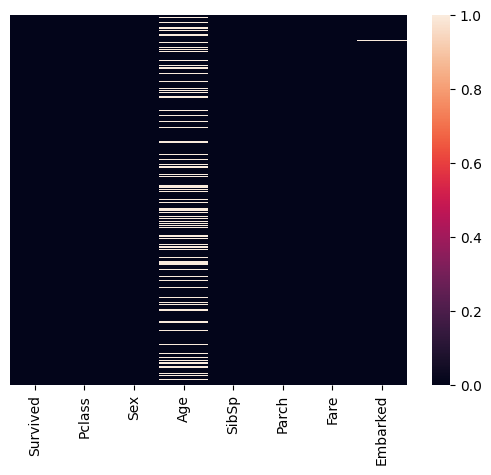

In [ ]:
# Seaborn é uma biblioteca de visualização de dados baseada no Matplotlib, e é frequentemente usada para criar gráficos estatísticos atraentes.
import seaborn as sns

'''
sns.heatmap(titanic.isnull(), yticklabels=False):

    titanic.isnull(): Gera um DataFrame booleano do mesmo tamanho que titanic onde os valores são True onde o valor correspondente em titanic é nulo (NaN), e False caso contrário.
    sns.heatmap(...): Cria um mapa de calor usando Seaborn. O mapa de calor representa visualmente os dados em uma grade, onde as cores indicam os valores. No caso de isnull(), o mapa de calor destaca os valores nulos.
    yticklabels=False: Remove os rótulos do eixo y (rótulos de linha) para evitar a sobrecarga visual.
'''
sns.heatmap(titanic.isnull(), yticklabels=False)

* **titanic.Age.isna():** Isso cria uma máscara booleana indicando as posições onde 'Age' é nulo.
* **(titanic.Pclass == 1):** Isso cria outra máscara booleana indicando as posições onde 'Pclass' é igual a 1.
* **titanic.loc[...]:** Isso localiza as linhas onde ambas as condições são verdadeiras e seleciona a coluna 'Age'.
* **titanic[titanic.Pclass == 1].Age.median():** Isso calcula a mediana da coluna 'Age' apenas para as linhas onde 'Pclass' é igual a 1.
* O resultado é atribuído às posições onde 'Age' é nulo e 'Pclass' é 1.

In [ ]:
titanic.loc[titanic.Age.isna() & (titanic.Pclass == 1), 'Age'] = titanic[titanic.Pclass == 1].Age.median()
titanic.loc[titanic.Age.isna() & (titanic.Pclass == 2), 'Age'] = titanic[titanic.Pclass == 2].Age.median()
titanic.loc[titanic.Age.isna() & (titanic.Pclass == 3), 'Age'] = titanic[titanic.Pclass == 3].Age.median()

<Axes: >

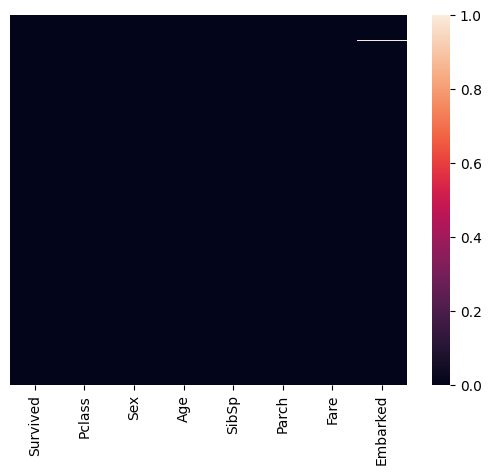

In [ ]:
sns.heatmap(titanic.isnull(), yticklabels=False)

In [ ]:
# titanic.dropna(): Este método é utilizado para remover linhas que contenham valores nulos em um DataFrame.
# inplace=True: O parâmetro inplace=True modifica o DataFrame original em vez de criar um novo DataFrame.
titanic.dropna(inplace=True)

<Axes: >

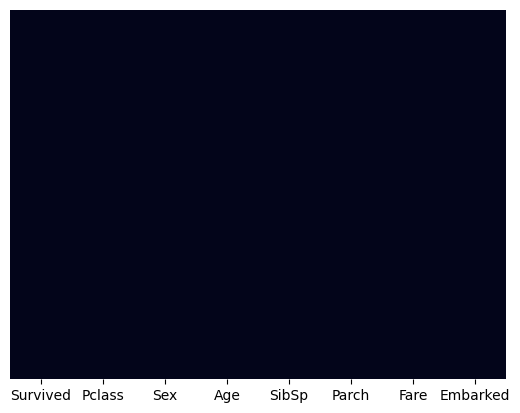

In [ ]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False)

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
embarque = pd.get_dummies(titanic['Embarked'])

In [ ]:
embarque

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [ ]:
sexo = pd.get_dummies(titanic['Sex'])

In [ ]:
sexo

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
titanic = pd.concat([titanic, embarque, sexo], axis = 1)

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,female,male
0,0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1,1,0
3,1,1,female,35.0,1,0,53.1000,S,0,0,1,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,0,1,0,1


In [ ]:
titanic.drop(['Embarked','Sex'], axis = 1, inplace = True)

In [ ]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,0,1


In [ ]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681,0.188976,0.086614,0.724409,0.350956,0.649044
std,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504,0.391710,0.281427,0.447063,0.477538,0.477538
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


##**15) Normal Padrão**

In [ ]:
# Esta linha importa a classe StandardScaler do módulo preprocessing da biblioteca scikit-learn.
# O StandardScaler é usado para padronizar (escala padrão) recursos removendo a média e escalando para a variância unitária.
from sklearn.preprocessing import StandardScaler

# Aqui, você cria uma instância da classe StandardScaler chamada scaler. Esta instância será usada para ajustar e transformar os dados.
scaler = StandardScaler()

# O método fit() do StandardScaler é chamado com o DataFrame titanic como argumento.
#Esse método calcula a média e o desvio padrão dos dados para serem usados na transformação posterior.
ajuste = scaler.fit(titanic)

# O método transform() é utilizado para aplicar a escala padrão aos dados. Os dados normalizados são armazenados na variável normal.
normal = scaler.transform(titanic)

# Os dados normalizados são convertidos de volta para um DataFrame do Pandas chamado normalpadrao.
# Isso pode ser útil se você quiser continuar trabalhando com os dados normalizados no formato DataFrame.
normalpadrao = pd.DataFrame(normal)

normalpadrao.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.786961,0.825209,-0.531670,0.431350,-0.474326,-0.500240,-0.482711,-0.307941,0.616794,-0.735342,0.735342
1,1.270711,-1.572211,0.680232,0.431350,-0.474326,0.788947,2.071634,-0.307941,-1.621287,1.359911,-1.359911
2,1.270711,0.825209,-0.228695,-0.475199,-0.474326,-0.486650,-0.482711,-0.307941,0.616794,1.359911,-1.359911
3,1.270711,-1.572211,0.453001,0.431350,-0.474326,0.422861,-0.482711,-0.307941,0.616794,1.359911,-1.359911
4,-0.786961,0.825209,0.453001,-0.475199,-0.474326,-0.484133,-0.482711,-0.307941,0.616794,-0.735342,0.735342


In [ ]:
normalpadrao.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02
mean,-1.228863e-16,-2.437745e-16,2.677523e-16,-3.197043e-17,-4.795564e-17,1.398706e-16,6.993531e-18,3.996303e-18,-7.493069e-17,-4.395934e-17,4.395934e-17
std,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00
min,-7.869611e-01,-1.572211e+00,-2.166224e+00,-4.751991e-01,-4.743259e-01,-6.462044e-01,-4.827108e-01,-3.079409e-01,-1.621287e+00,-7.353420e-01,-1.359911e+00
25%,-7.869611e-01,-3.735013e-01,-5.316702e-01,-4.751991e-01,-4.743259e-01,-4.872378e-01,-4.827108e-01,-3.079409e-01,-1.621287e+00,-7.353420e-01,-1.359911e+00
50%,-7.869611e-01,8.252086e-01,-2.286946e-01,-4.751991e-01,-4.743259e-01,-3.551972e-01,-4.827108e-01,-3.079409e-01,6.167940e-01,-7.353420e-01,7.353420e-01
75%,1.270711e+00,8.252086e-01,5.666164e-01,4.313502e-01,-4.743259e-01,-2.207954e-02,-4.827108e-01,-3.079409e-01,6.167940e-01,1.359911e+00,7.353420e-01
max,1.270711e+00,8.252086e-01,3.861476e+00,6.777195e+00,6.967010e+00,9.668551e+00,2.071634e+00,3.247377e+00,6.167940e-01,1.359911e+00,7.353420e-01


##**16) Distribuição de Probabilidade**

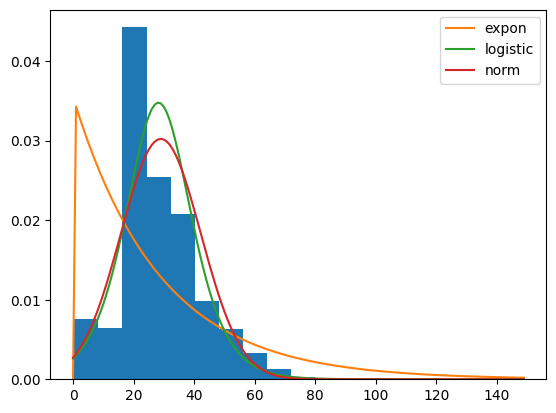

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

# Suponha que 'titanic' é o DataFrame que você está usando
size = 150
x = np.arange(size)
y = titanic['Age'].dropna().values  # Usando a coluna 'Age' do Titanic como exemplo

# Histograma
h = plt.hist(y, density=True)

dist_names = ['expon', 'logistic', 'norm']
for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    params = dist.fit(y)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    if arg:
        pdf_fitted = dist.pdf(x, *arg, loc=loc, scale=scale)
    else:
        pdf_fitted = dist.pdf(x, loc=loc, scale=scale)
    plt.plot(pdf_fitted, label=dist_name)

plt.legend(loc='upper right')
plt.show()


In [ ]:
import plotly.express as px

fig = px.histogram(titanic, x = 'Age', marginal = 'rug', nbins = 30, title = 'Histograma de Idade no Titanic')
fig.show()

In [ ]:
import plotly.express as px
import pandas as pd

# Suponha que 'titanic' é o DataFrame que você está usando
# Substitua as colunas conforme o seu conjunto de dados
fig2 = px.box(titanic, x='Pclass', y='Fare', points="all", color='Survived', title='Gráfico de Caixa no Titanic')
fig2.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Suponha que 'titanic' é o DataFrame que você está usando
fig2 = px.box(titanic, x='Survived', y='Fare', points="all", title='Gráfico de Caixa no Titanic')
fig2.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Suponha que 'titanic' é o DataFrame que você está usando
fig2 = px.box(titanic, x='Survived', y='Fare', points="all",
              title='Distribuição da Tarifa por Sobrevivência',
              labels={'Survived': 'Sobrevivência', 'Fare': 'Tarifa'},
              category_orders={'Survived': [0, 1]},
              color_discrete_map={0: 'red', 1: 'green'},
              width=800, height=500)

fig2.update_layout(xaxis=dict(tickvals=[0, 1], ticktext=['Não Sobreviveu', 'Sobreviveu']),
                   legend=dict(title=''),
                   showlegend=False)

fig2.show()


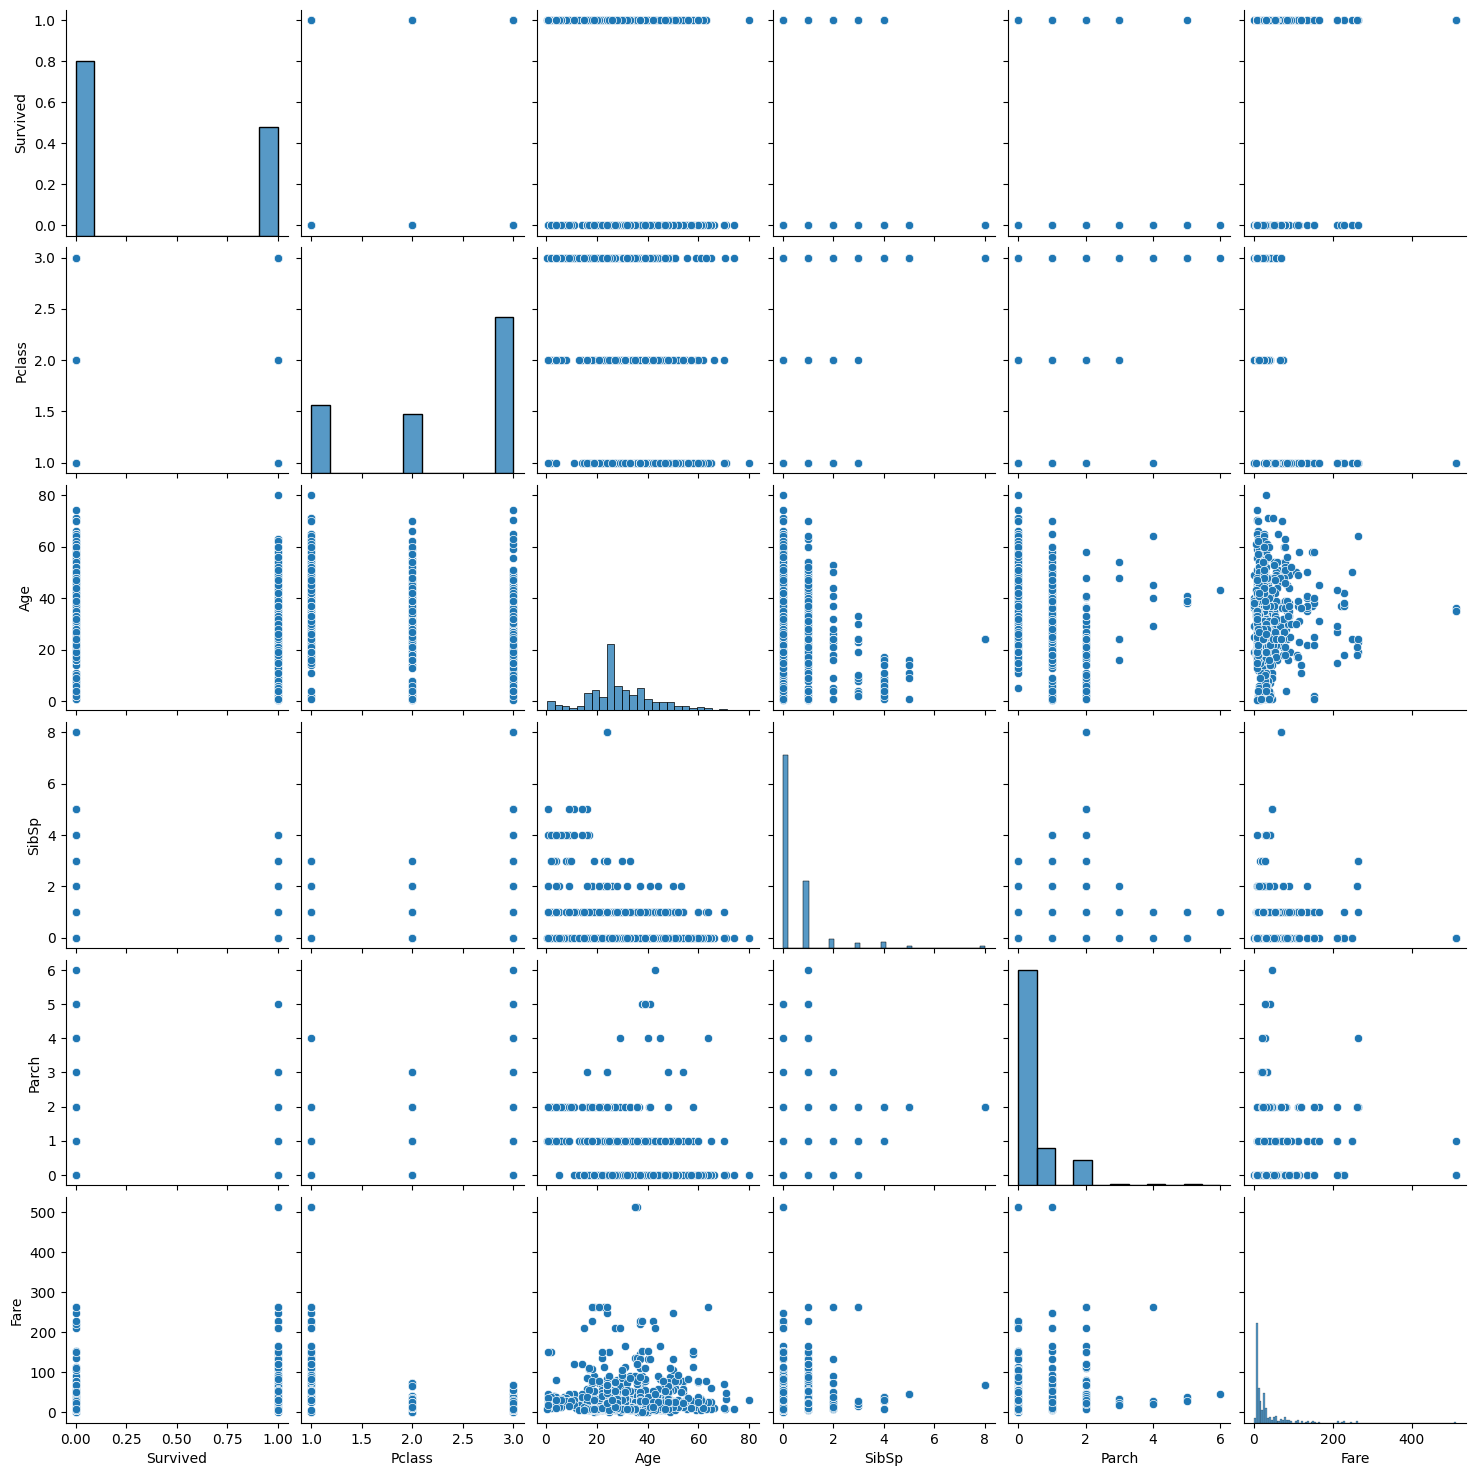

In [ ]:
import seaborn as sns

col = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
sns.pairplot(titanic[col])


In [ ]:
titanic[['Pclass', 'Survived']].corr()

,Pclass,Survived
Pclass,1.000000,-0.335549
Survived,-0.335549,1.000000


##**17) Distribuição Amostral**

In [ ]:
from numpy.random import seed
from numpy.random import randint
from numpy import mean

seed(1)

rol=randint(1,7,50)
print(rol)
print(mean(rol))

[6 4 5 1 2 4 6 1 1 2 5 6 5 2 3 5 6 3 5 4 5 3 5 6 3 5 2 2 1 6 2 2 6 2 2 1 5
 2 1 1 6 4 3 2 1 4 6 2 2 4]
3.44


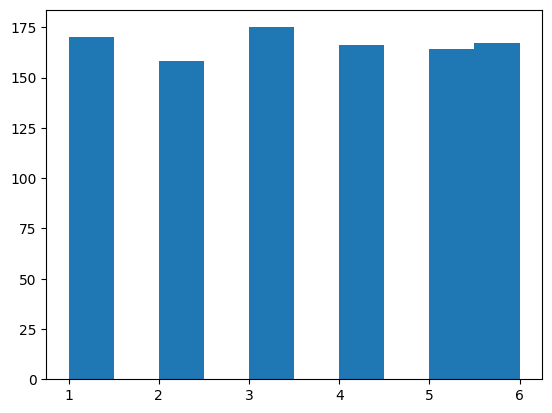

In [ ]:
from matplotlib import pyplot

means = [mean(randint(1,7,1)) for _ in range(1000)]

pyplot.hist(means)
pyplot.show()

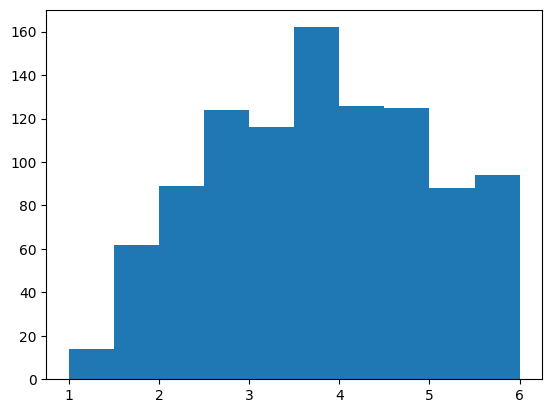

In [ ]:
means = [mean(randint(1,7,2)) for _ in range(1000)]

pyplot.hist(means)
pyplot.show()

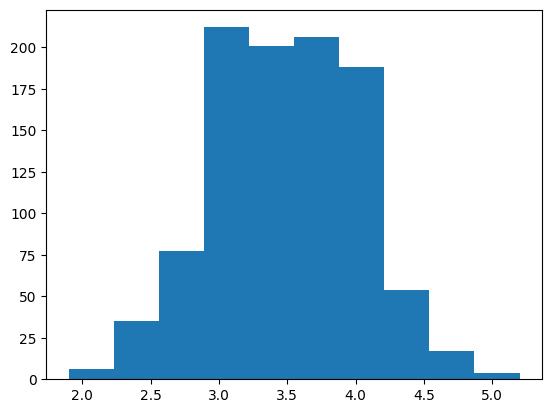

In [ ]:
means = [mean(randint(1,7,10)) for _ in range(1000)]

pyplot.hist(means)
pyplot.show()

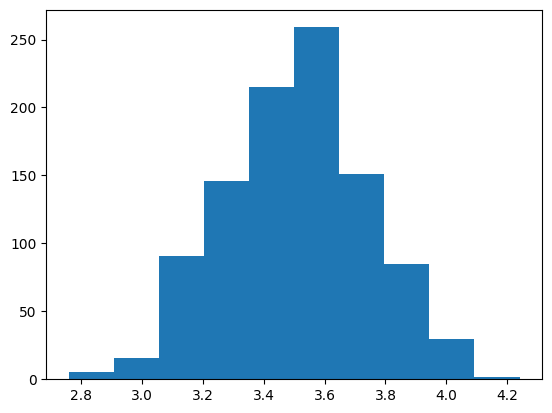

In [ ]:
means = [mean(randint(1,7,50)) for _ in range(1000)]

pyplot.hist(means)
pyplot.show()

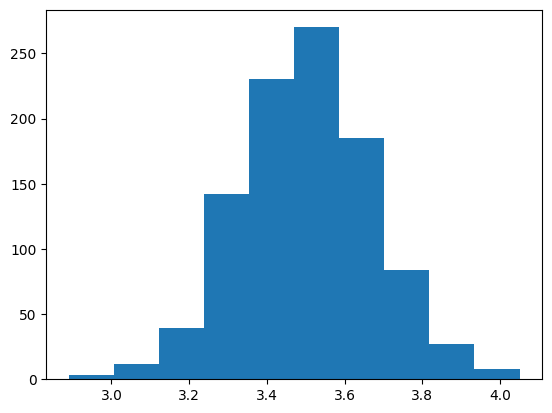

In [ ]:
means = [mean(randint(1,7,100)) for _ in range(1000)]

pyplot.hist(means)
pyplot.show()


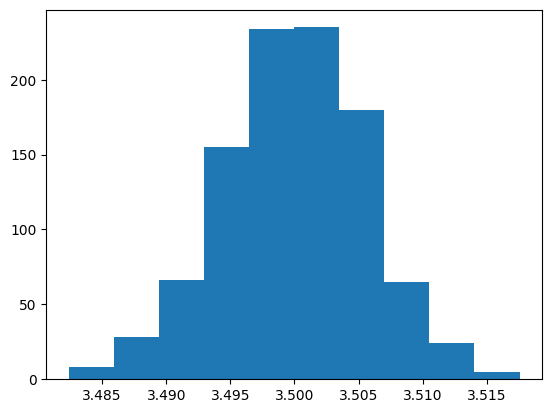

In [ ]:
means = [mean(randint(1,7,100000)) for _ in range(1000)]

pyplot.hist(means)
pyplot.show()

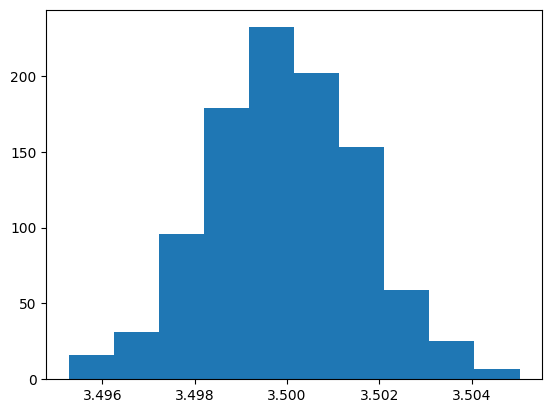

In [ ]:
means = [mean(randint(1,7,1000000)) for _ in range(1000)]

pyplot.hist(means)
pyplot.show()